In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
# import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import gzip
import json
import string

import nltk # imports the natural language toolkit
import plotly
from wordcloud import WordCloud

from collections import Counter
from nltk.util import ngrams
import re

In [2]:
data = pd.read_excel(r'C:\Users\dcalle.MATONE\Downloads\WRI_Policy_Tags (1).xlsx', sheet_name = None)
df = None

if isinstance(data, dict):
    for key, value in data.items():
        if not isinstance(df,pd.DataFrame):
            df = value
        else:
            df = df.append(value)
else:
    df = data
df.head()

Document  \
0  2019 ACUERDO por el que se emiten los Lineamie...   
1  2019 ACUERDO por el que se emiten los Lineamie...   
2  2019 ACUERDO por el que se emiten los Lineamie...   
3  2019 ACUERDO por el que se emiten los Lineamie...   
4  2019 ACUERDO por el que se emiten los Lineamie...   

                                                Text  \
0  Generar empleo y garantizara la población camp...   
1  \nEl Programa incentivará a los sujetos agrari...   
2  Los sujetos agrarios beneficiados por el progr...   
3  El sujeto de derecho, recibirá un apoyo económ...   
4  El sujeto de derecho, recibirá en especie las ...   

                                Incentive Instrument  \
0  Direct payment (PES), Credit, Technical assist...   
1  Direct payment (PES), Credit, Technical assist...   
2                     Supplies, Technical assistance   
3                              Direct payment (PES)    
4                                         Supplies     

                Land Use Type   Category     Unique Policy #  \
0  Forest, Agriculture (Crop)  Incentive  1 (Sembrando Vida)   
1  Forest, Agriculture (Crop)  Incentive  1 (Sembrando Vida)   
2  Forest, Agriculture (Crop)  Incentive  1 (Sembrando Vida)   
3  Forest, Agriculture (Crop)  Incentive  1 (Sembrando Vida)   
4  Forest, Agriculture (Crop)  Incentive  1 (Sembrando Vida)   

                                           Key words relevant sentences  \
0  insumo, crédito, capacitación, asistencia técnica                NaN   
1                                         incentivar                NaN   
2  apoyo económico, apoyos en especie, insumos, h...                NaN   
3                                              pesos                NaN   
4                                            recibir                NaN   

  Key Words  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

Text(0.5, 1.0, 'Histogram of number of words per sentence')

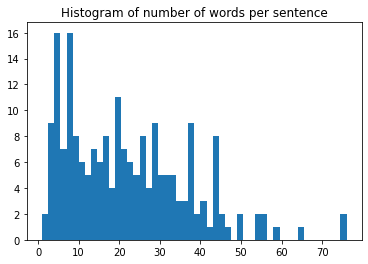

In [3]:
sentences = df["relevant sentences"].apply(lambda x: x.split(";") if isinstance(x,str) else x)
sentence = []

for elem in sentences:
    if isinstance(elem,float) or len(elem) == 0:
        continue
    elif isinstance(elem,list):
        for i in elem:
            if len(i.strip()) == 0:
                continue
            else:
                sentence.append(i.strip())
    else:
        if len(elem.strip()) == 0:
            continue
        else:
            sentence.append(elem.strip())

sentence
words_per_sentence = [len(x.split(" ")) for x in sentence]
plt.hist(words_per_sentence, bins = 50)
plt.title("Histogram of number of words per sentence")

In [4]:
noise_words = []
stopwords_corpus = nltk.corpus.stopwords
sp_stop_words = stopwords_corpus.words('spanish')
noise_words.extend(sp_stop_words)
print(len(noise_words))

if "no" in noise_words:
    noise_words.remove("no")

313


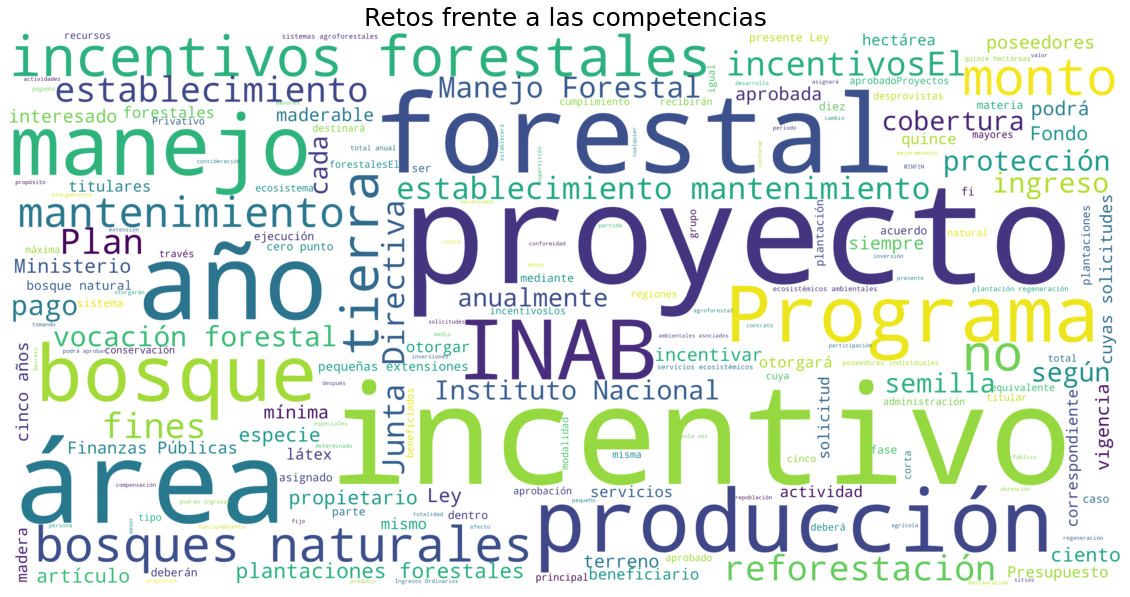

In [5]:
wordcloud = WordCloud(max_font_size=100, max_words=200, background_color="white", #,mask=wave_mask
                          scale = 10,width=800, height=400,stopwords=noise_words,normalize_plurals= True).generate(''.join(sentence))

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Retos frente a las competencias", fontsize=25)
plt.axis("off")
plt.show()

In [6]:
def top_k_ngrams(word_tokens,n,k):
    
    ## Getting them as n-grams
    n_gram_list = list(ngrams(word_tokens, n))

    ### Getting each n-gram as a separate string
    n_gram_strings = [' '.join(each) for each in n_gram_list]
    
    n_gram_counter = Counter(n_gram_strings)
    most_common_k = n_gram_counter.most_common(k)
    print(most_common_k)

tokenized_words = nltk.word_tokenize(''.join(sentence))
word_freq = Counter(tokenized_words)
# word_freq.most_common(20)
# list(ngrams(tokenized_words, 3))

word_tokens_clean = [re.findall(r"[a-zA-Z]+",each) for each in tokenized_words if each.lower() not in noise_words and len(each.lower()) > 1]
word_tokens_clean = [each[0].lower() for each in word_tokens_clean if len(each)>0]
top_k_ngrams(word_tokens_clean, 4, 20)

[('cuyas solicitudes ingreso programa', 6), ('solicitudes ingreso programa aprobadas', 6), ('ingreso programa aprobadas a', 6), ('manejo bosques naturales fines', 5), ('bosques naturales fines producci', 5), ('instituto nacional bosques inab', 5), ('programa aprobadas a proyectos', 5), ('incentivos forestales poseedores peque', 4), ('forestales poseedores peque extensiones', 4), ('establecimiento mantenimiento plantaciones forestales', 4), ('junta directiva instituto nacional', 4), ('a establecimiento cinco a', 4), ('a mantenimiento seg plan', 4), ('mantenimiento seg plan manejo', 4), ('seg plan manejo forestal', 4), ('programa incentivos forestales poseedores', 3), ('poseedores peque extensiones tierra', 3), ('poseedores peque extensiones tierras', 3), ('peque extensiones tierras vocaci', 3), ('extensiones tierras vocaci forestal', 3)]


In [ ]:
nltk.download('averaged_perceptron_tagger')

def ExtractInteresting(sentence, match = ["NN","CD"]):
    words = nltk.word_tokenize(sentence)
    interesting = [k for k,v in nltk.pos_tag(words) if v in match]
    return(interesting)

def next_word(sentence):

    items = list()
    word_tokens = nltk.word_tokenize(sentence)
    
    if "good" not in word_tokens: return ""
    
    while "good" in word_tokens:
        idx = word_tokens.index("good")
        pos_words = [k for k,v in nltk.pos_tag(word_tokens[idx:]) if v in ["NN","CD"]]
        if len(pos_words) > 0: items.append(pos_words[0])
        del word_tokens[idx]
    
    return items
    
def prev_word(sentence):
    items = list()
    word_tokens = nltk.word_tokenize(sentence)
    
    if "good" not in word_tokens: return ""
    
    while "good" in word_tokens:
        idx = word_tokens.index("good")
        pos_words = [k for k,v in nltk.pos_tag(word_tokens[:idx]) if v in ["NN","CD"]]
        if len(pos_words) > 0: items.append(pos_words[-1])      #take the last element since it is the one before "good"
        del word_tokens[idx]
    
    return items

# Check de los CSV de El Salvador

In [27]:
import os
import pandas as pd
folder = r"C:\Users\dcalle.MATONE\Documents\GitHub\policy-data-analyzer\tasks\Scrapy\scrapy_official_newspapers"
file1= r"Scraped_Documents_ElSalvador.csv"
file2= r"Scraped_Documents_ElSalvador_agricola_energia.csv"
file_1 = os.path.join(folder,file1)
file_2 = os.path.join(folder,file2)
df1 = pd.read_csv(file_1, index_col = 0)
header = ["Issuing body", "country", "Search url", "Unnamed","Ref1", "Format", "File url", "Download date", "Published", "N0","N1", "N2", "N3", "Ref", "Summary", "Title", "info url"]
df2 = pd.read_csv(file_2, encoding = "latin1", names = header)
df1

Issuing body is_enforced  \
0         INSTITUCIONES AUTÓNOMAS (Alcaldía Municipal)  30/11/2020   
1    ORGANO EJECUTIVO (Ministerio de Medio Ambiente...  30/11/2020   
2         INSTITUCIONES AUTÓNOMAS (Alcaldía Municipal)  30/11/2020   
3    ORGANO EJECUTIVO (Ministerio de Medio Ambiente...  30/11/2020   
4         INSTITUCIONES AUTÓNOMAS (Alcaldía Municipal)  30/11/2020   
..                                                 ...         ...   
362                                 ORGANO LEGISLATIVO  30/11/2020   
363                             MINISTERIO DE ECONOMIA  30/11/2020   
364                                 ORGANO LEGISLATIVO  30/11/2020   
365                                 ORGANO LEGISLATIVO  30/11/2020   
366                                 ORGANO LEGISLATIVO  30/11/2020   

      Published                                           File url  \
0    27/01/2015  https://www.jurisprudencia.gob.sv/DocumentosBo...   
1    01/02/2018  https://www.jurisprudencia.gob.sv/DocumentosBo...   
2    21/08/2017  https://www.jurisprudencia.gob.sv/DocumentosBo...   
3    08/10/2014  https://www.jurisprudencia.gob.sv/DocumentosBo...   
4    06/09/2012  https://www.jurisprudencia.gob.sv/DocumentosBo...   
..          ...                                                ...   
362  24/01/1996  https://www.jurisprudencia.gob.sv/DocumentosBo...   
363  07/08/1996  https://www.jurisprudencia.gob.sv/DocumentosBo...   
364  23/08/1996  https://www.jurisprudencia.gob.sv/DocumentosBo...   
365  04/03/1991  https://www.jurisprudencia.gob.sv/DocumentosBo...   
366  08/03/1993  https://www.jurisprudencia.gob.sv/DocumentosBo...   

                                       Ref  \
0              Decreto Municipal-Tamanique   
1                        Decreto Ejecutivo   
2                 Decreto Municipal-Jocoro   
3                        Decreto Ejecutivo   
4    Decreto Municipal-San José Villanueva   
..                                     ...   
362                  Decretos Legislativos   
363                            Reglamentos   
364                    Decreto Legislativo   
365                  Decretos Legislativos   
366                  Decretos Legislativos   

                                               Summary  \
0    La presente Ordenanza tiene por objeto, promov...   
1    El presente Decreto tiene como objetivos conse...   
2    La presente ordenanza tiene por objeto estable...   
3    El presente Decreto tiene como objetivos conse...   
4    El objeto de la presente Ordenanza es el de no...   
..                                                 ...   
362  La presente Ley tiene por objeto regular los a...   
363  Las disposiciones comprendidas en el presente ...   
364  La presente Ley tiene como finalidad crear un ...   
365  La presente Ley tiene por objeto canalizar rec...   
366  Por medio de la presente Ley, se crea el CENTR...   

                                                 Title  \
0    ORDENANZA REGULADORA DE USOS DE SUELO Y ACTUAC...   
1    DECRETO POR MEDIO DEL CUAL SE ESTABLECE COMO A...   
2    ORDENANZA REGULADORA DE LOS RESIDUOS SOLIDOS D...   
3    DECRETO POR MEDIO DEL CUAL SE ESTABLECE AREA N...   
4    ORDENANZA DE CONTRIBUCION ESPECIAL DE INSTALAC...   
..                                                 ...   
362                                     LEY DE MINERIA   
363                    REGLAMENTO DE LA LEY DE MINERIA   
364       LEY DE LA CORPORACION SALVADOREÑA DE TURISMO   
365  LEY PARA EL FINANCIAMIENTO DE LA PEQUEÑA PROPI...   
366  LEY DE CREACION DEL CENTRO NACIONAL DE TECNOLO...   

                                    File name  
0    765d4ea2383aaf45bb29bf75feadea6e06a80fd2  
1    06dafc0a507e270d9b23b192489cb1012aed1a8f  
2    3416cbf9af02b66c40c8ee6f6aa5988ba680dcb2  
3    485f9571c67f4a8009dd340bc5905f56a767b400  
4    2c1449a52f077b5b0d61471a55601f0a316be1a9  
..                                        ...  
362  fc7393e17b4b86ec89bd8a58529332ecb5bc8da5  
363  e7ec4a039e268506de1672ed

In [30]:
print(df1.columns)
cols = ['Issuing body', 'Published', 'File url', 'Ref',
       'Summary', 'Title']
df2 = df2[cols]
df2

Index(['Issuing body', 'is_enforced', 'Published', 'File url', 'Ref',
       'Summary', 'Title', 'File name'],
      dtype='object')


Issuing body   Published  \
0    INSTITUCIONES AUTÓNOMAS (Alcaldía Municipal)  15/03/2018   
1    INSTITUCIONES AUTÓNOMAS (Alcaldía Municipal)  27/01/2015   
2       ORGANO EJECUTIVO (Ministerio de Economía)  17/12/2015   
3    INSTITUCIONES AUTÓNOMAS (Alcaldía Municipal)  11/02/2015   
4    INSTITUCIONES AUTÓNOMAS (Alcaldía Municipal)  19/12/2011   
..                                            ...         ...   
321                            ORGANO LEGISLATIVO  24/01/1996   
322                        MINISTERIO DE ECONOMIA  07/08/1996   
323                            ORGANO LEGISLATIVO  29/06/1994   
324                            ORGANO LEGISLATIVO  30/08/1994   
325                        MINISTERIO DE ECONOMIA  21/11/1994   

                                              File url  \
0    https://www.jurisprudencia.gob.sv/DocumentosBo...   
1    https://www.jurisprudencia.gob.sv/DocumentosBo...   
2    https://www.jurisprudencia.gob.sv/DocumentosBo...   
3    https://www.jurisprudencia.gob.sv/DocumentosBo...   
4    https://www.jurisprudencia.gob.sv/DocumentosBo...   
..                                                 ...   
321  https://www.jurisprudencia.gob.sv/DocumentosBo...   
322  https://www.jurisprudencia.gob.sv/DocumentosBo...   
323  https://www.jurisprudencia.gob.sv/DocumentosBo...   
324  https://www.jurisprudencia.gob.sv/DocumentosBo...   
325  https://www.jurisprudencia.gob.sv/DocumentosBo...   

                               Ref  \
0      Decreto Municipal-San Simón   
1      Decreto Municipal-Tamanique   
2                Decreto Ejecutivo   
3    Decreto Municipal-Santa Elena   
4       Decreto Municipal-Comalapa   
..                             ...   
321          Decretos Legislativos   
322                    Reglamentos   
323            Decreto Legislativo   
324            Decreto Legislativo   
325                    Reglamentos   

                                               Summary  \
0    La presente ordenanza tiene por objeto propici...   
1    La presente Ordenanza tiene por objeto, promov...   
2    El presente Reglamento tiene por objeto reglam...   
3    La presente Ordenanza tiene por objeto estable...   
4    La presente ordenanza tiene por objeto emitir ...   
..                                                 ...   
321  La presente Ley tiene por objeto regular los a...   
322  Las disposiciones comprendidas en el presente ...   
323  Por medio de la presente Ley, se crea el Fondo...   
324  La presente ley tiene por objeto regular la tr...   
325  El presente Reglamento tiene por objeto desarr...   

                                                 Title  
0    ORDENANZA MUNICIPAL PARA LA PROTECCION DE LAS ...  
1    ORDENANZA REGULADORA DE USOS DE SUELO Y ACTUAC...  
2    REGLAMENTO ESPECIAL PARA ALMACENAMIENTO, AUTOC...  
3    ORDENANZA REGULADORA DE LA INSTALACION Y FUNCI...  
4    ORDENANZA MUNICIPAL AMBIENTAL PARA LA PROTECCI...  
..                                                 ...  
321                                     LEY DE MINERIA  
322                    REGLAMENTO DE LA LEY DE MINERIA  
323             LEY DEL FONDO AMBIENTAL DE EL SALVADOR  
324  LEY DE PRIVATIZACION DE INGENIOS Y PLANTAS DE ...  
325  REGLAMENTO DE LA LEY DE PRIVATIZACION DE INGEN...  

[326 rows x 6 columns]

In [47]:
titles1 = df1.Title.values.tolist()
titles2 = df2.Title.values.tolist()
len(set(titles2))
len(titles2)
len(set(titles1))
len(titles1)
all_titles = titles1 + titles2
len(set(all_titles))

460

In [56]:
col_short = ['Issuing body', 'Published', 'File url', 'Ref',
       'Summary', 'Title']
df1_short = df1[col_short]
df2_short = df2[col_short]
df_all = df1_short.append(df2_short, ignore_index = True)
df_all.drop_duplicates(subset = ["Title"], inplace = True)
df_all

Issuing body   Published  \
0         INSTITUCIONES AUTÓNOMAS (Alcaldía Municipal)  27/01/2015   
1    ORGANO EJECUTIVO (Ministerio de Medio Ambiente...  01/02/2018   
2         INSTITUCIONES AUTÓNOMAS (Alcaldía Municipal)  21/08/2017   
3    ORGANO EJECUTIVO (Ministerio de Medio Ambiente...  08/10/2014   
4         INSTITUCIONES AUTÓNOMAS (Alcaldía Municipal)  06/09/2012   
..                                                 ...         ...   
661          INSTITUCIÓN AUTÓNOMA (ALCALDÍA MUNICIPAL)  19/03/2003   
663       INSTITUCIONES AUTÓNOMAS (Alcaldía Municipal)  26/08/2004   
686                                 ORGANO LEGISLATIVO  20/05/1991   
691                                 ORGANO LEGISLATIVO  30/08/1994   
692                             MINISTERIO DE ECONOMIA  21/11/1994   

                                              File url  \
0    https://www.jurisprudencia.gob.sv/DocumentosBo...   
1    https://www.jurisprudencia.gob.sv/DocumentosBo...   
2    https://www.jurisprudencia.gob.sv/DocumentosBo...   
3    https://www.jurisprudencia.gob.sv/DocumentosBo...   
4    https://www.jurisprudencia.gob.sv/DocumentosBo...   
..                                                 ...   
661  https://www.jurisprudencia.gob.sv/DocumentosBo...   
663  https://www.jurisprudencia.gob.sv/DocumentosBo...   
686  https://www.jurisprudencia.gob.sv/DocumentosBo...   
691  https://www.jurisprudencia.gob.sv/DocumentosBo...   
692  https://www.jurisprudencia.gob.sv/DocumentosBo...   

                                       Ref  \
0              Decreto Municipal-Tamanique   
1                        Decreto Ejecutivo   
2                 Decreto Municipal-Jocoro   
3                        Decreto Ejecutivo   
4    Decreto Municipal-San José Villanueva   
..                                     ...   
661                 Ordenanzas Municipales   
663          Decreto Municipal-Cojutepeque   
686                  Decretos Legislativos   
691                    Decreto Legislativo   
692                            Reglamentos   

                                               Summary  \
0    La presente Ordenanza tiene por objeto, promov...   
1    El presente Decreto tiene como objetivos conse...   
2    La presente ordenanza tiene por objeto estable...   
3    El presente Decreto tiene como objetivos conse...   
4    El objeto de la presente Ordenanza es el de no...   
..                                                 ...   
661  La ordenanza regula el procedimiento para la a...   
663  La presente Ordenanza tiene como finalidad el ...   
686  Las disposiciones de la presenta Ley se aplica...   
691  La presente ley tiene por objeto regular la tr...   
692  El presente Reglamento tiene por objeto desarr...   

                                                 Title  
0    ORDENANZA REGULADORA DE USOS DE SUELO Y ACTUAC...  
1    DECRETO POR MEDIO DEL CUAL SE ESTABLECE COMO A...  
2    ORDENANZA REGULADORA DE LOS RESIDUOS SOLIDOS D...  
3    DECRETO POR MEDIO DEL CUAL SE ESTABLECE AREA N...  
4    ORDENANZA DE CONTRIBUCION ESPECIAL DE INSTALAC...  
..                                                 ...  
661  ORDENANZA REGULADORA PARA EL FUNCIONAMIENTO DE...  
663  ORDENANZA REGULADORA PARA LA INSTALACION DE AN...  
686  LEY PARA LA COMPLEMENTACION ALIMENTARIA PARA L...  
691  LEY DE PRIVATIZACION DE INGENIOS Y PLANTAS DE ...  
692  REGLAMENTO DE LA LEY DE PRIVATIZACION DE INGEN...  

[460 rows x 6 columns]

In [54]:
df_all.to_csv(os.path.join(folder,"El_Salvador_no_duplicates.tsv"), sep = "\t")